In [1]:
import matplotlib.pyplot as plt
import time
from mesa.batchrunner import batch_run
import pandas as pd
import numpy as np
%matplotlib inline

from model2 import SchellingModel


C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


VERB
1


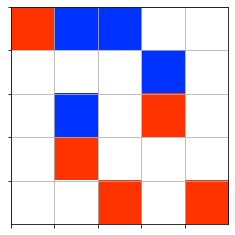

In [2]:
model = SchellingModel(5, 0.5, 0.5, 0.5, verbose = 1,skip_if_not_happy=True, relocation_policy="min_gain")
model.show()

In [3]:
while model.running and model.schedule.steps < 2:
    model.step()
    
print("Steps before stop condition")
print(model.schedule.steps) # Show how many steps have actually run


STAMPA RANK
    x  y  happiness
0   0  0          0
1   0  0          0
2   0  0          0
3   0  0          0
4   0  0          0
5   0  0          0
6   0  0          0
7   0  0          0
8   0  0          0
9   0  0          0
10  0  0          0
11  0  0          0
12  0  0          0
13  0  0          0
14  0  0          0
15  0  0          0
Agent in pos (2, 1), di tipo 2
Sono in (0, 3)
Num neigh contando anche me: 2
Neigh è (0, 2)
Neigh è (1, 3)
Num neigh senza contare anche me: 2
Similar sono 2
Happiness è 1.0
Sono in (0, 4)
Num neigh contando anche me: 1
Neigh è (1, 3)
Num neigh senza contare anche me: 1
Similar sono 1
Happiness è 1.0
Sono in (1, 0)
Num neigh contando anche me: 3
Neigh è (0, 0)
Neigh è (0, 1)
Num neigh senza contare anche me: 2
Similar sono 1
Happiness è 0.5
Sono in (1, 1)
Num neigh contando anche me: 4
Neigh è (0, 0)
Neigh è (0, 1)
Neigh è (0, 2)
Num neigh senza contare anche me: 3
Similar sono 2
Happiness è 0.6666666666666666
Sono in (1, 2)
Num neigh conta

Neigh è (3, 1)
Num neigh senza contare anche me: 1
Similar sono 0
Happiness è 0.0
Sono in (4, 1)
Num neigh contando anche me: 2
Neigh è (3, 1)
Neigh è (4, 2)
Num neigh senza contare anche me: 2
Similar sono 0
Happiness è 0.0
Sono in (4, 3)
Num neigh contando anche me: 1
Neigh è (4, 2)
Num neigh senza contare anche me: 1
Similar sono 0
Happiness è 0.0
Sono in (4, 4)
Num neigh contando anche me: 0
Num neigh senza contare anche me: 0
Similar sono 0
Happiness è 0
freeCellsRank è     x  y  happiness
0   0  3   1.000000
1   1  1   0.750000
2   1  2   0.666667
3   2  0   0.500000
4   2  1   0.500000
5   0  4   0.000000
6   1  4   0.000000
7   2  2   0.000000
8   3  0   0.000000
9   3  2   0.000000
10  3  3   0.000000
11  3  4   0.000000
12  4  0   0.000000
13  4  1   0.000000
14  4  3   0.000000
15  4  4   0.000000
df_happy è    x  y  happiness
0  0  3   1.000000
1  1  1   0.750000
2  1  2   0.666667
3  2  0   0.500000
4  2  1   0.500000
df_happy è: 
   x  y  happiness
0  2  0        0.5
1  2

In the following notebook we will test the Schelling Model over different relocation policies. 
The tests are structured in the following way:
* We start by defining, for each attribute of the model, all the values that we will try.
* In each test, done through a batch run, we choose one attribute whose value will vary and we fix all the remaining attributes to a default value, in order to see how the model behaves by varying a single attribute per time, so how each attribute influence the middle and final results. For each attribute, the value that is fixed is usually a median value in the set defined for it 

In [7]:
#FOR EACH ATTRIBUTE, SET OF VALUES THAT WE WILL TRY 
homophily_set = [0.2, 0.4, 0.6, 0.8]
neighborhood_set = ['abs',"rel"]
side_set = [20,40,60]
density_set = [0.2, 0.4, 0.6, 0.8]
minority_set = [0.2, 0.4, 0.6, 0.8]

#DEFAULT VALUE FOR EACH ATTRIBUTE
#homophily default = 0.4
#neighborhood_type default = rel
#side default = 40
#density default = 0.6
#minority default = 0.4

The neighborhood considered is always the Moore neighborhood.

* Neighborhood type = abs (absolute) means that for each agent, when we compute its segregation, we do NUM_similar_agents/8

* Neighborhood type = rel (relative) means that for each agent, when we compute its segregation, we do NUM_similar_agents/NUM_agents_in_its_neighborhood



Each batch run performs the following steps:
* Define parameter values (parameters whose value will change are defined by a list, others that remain fixed are defined by a single value)
* Start the batch run
* Save the results into a csv file
* Load the csv file
* Plot of the results showing the behaviours

* NB: since the batch run could require a large exectuion time, the csv file produced are provided in the folder and loaded. 

In the following graphs we will see how the execution time (seconds) and the average segregation change (average of the segregation value of all the agents in a given step) by varying the other parameters.

The average segregation is computed as follows:
* for each agent, in a given step, compute its segregation as NUM_similar_agents/NUM_agents_in_its_neighborhood
* compute the mean of all the agents segregation value

NB: an agent is happy if and only if its segregation value is greater or equal than the defined threshold.

**FIXED SIDE-NEIGHBORHOOD_TYPE-DENSITY-MINORITY, VARY HOMOPHILY**

In [107]:
parameters = {"side": [40], "neighborhood_type":["rel"], "density": [0.6], "homophily": [0.2,0.4,0.6,0.8], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sndm_h = pd.DataFrame(results)
df_sndm_h.to_csv('df_sndm_h_2.csv', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [06:01<00:00, 22.58s/it]


In [8]:
df1 = pd.read_csv('df_sndm_h_2.csv')  
#remove the attributes not used in the plot 
df1 = df1.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df1

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.6,0.2,0.4,pure_random,0.908999,0.545226,0.047338,0.000000,NaN,NaN
1,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,0.0,0.00
2,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,1.0,1.00
3,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,2.0,0.00
4,1,40,rel,0.6,0.2,0.4,pure_random,0.972700,0.602205,0.015630,0.000000,3.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189249,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,922.0,1.00
189250,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,923.0,1.00
189251,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,924.0,1.00
189252,13,40,rel,0.6,0.6,0.4,min_gain,1.000000,0.931679,0.015523,321.458546,925.0,1.00


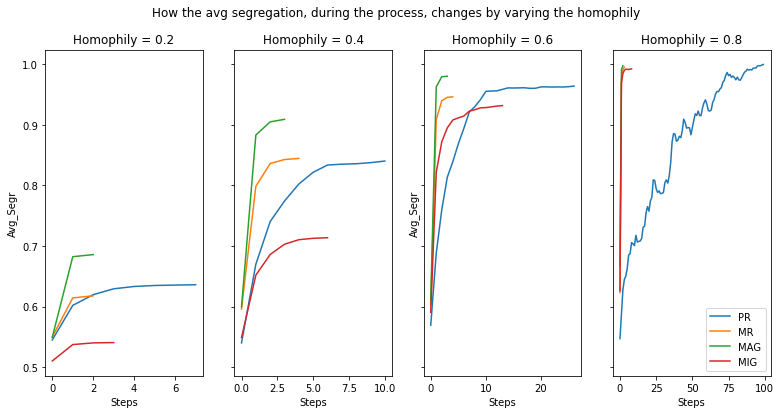

In [14]:
f, ax = plt.subplots(1,4, figsize=(13, 6), sharey = True)

p1 = df1[(df1["homophily"]==homophily_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[0].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[0].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[0].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[0].set_title('Homophily = 0.2')
ax[0].set_ylabel('Avg_Segr')
ax[0].set_xlabel('Steps')
###################################################

p1 = df1[(df1["homophily"]==homophily_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[1].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[1].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[1].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[1].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[1].set_title('Homophily = 0.4')
ax[1].set_xlabel('Steps')
####################################################

p1 = df1[(df1["homophily"]==homophily_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[2].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[2].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[2].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[2].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[2].set_title('Homophily = 0.6')
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Avg_Segr')
#################################################

p1 = df1[(df1["homophily"]==homophily_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[3].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[3].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[3].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[3].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')


ax[3].set_title('Homophily = 0.8')
ax[3].set_xlabel('Steps')

f.suptitle('How the avg segregation, during the process, changes by varying the homophily')
plt.legend()

In the plot above we can see that the avg segregation grows in direct proportion with the homophily. 
This happens beacause increasing the homophily implies that, if i'm an agent, i need more agents like me in order to be happy, so the algorithm will converge only when few great clusters of the same agent type take places.

In fact, usually, an increasing homophily value is highly correlated with a bigger cluster size and a bigger cluster size means that the avg segragtion will be higher. 

About the different policies, we can see that the max_gain policy is the one reaching the higest homophily value. Among the different policies, the proportions remains always the same.
The exception is given by the pure_random policy, which usually behaves as the mean of the other policies.

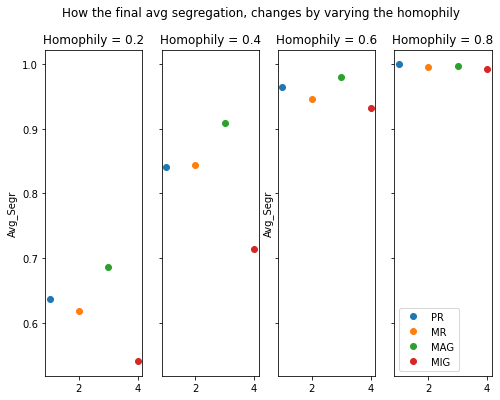

In [15]:
f, ax = plt.subplots(1,4, figsize=(8, 6), sharey = True)

p1 = df1[(df1["homophily"]==homophily_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[0].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[0].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[0].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[0].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[0].set_title('Homophily = 0.2')
ax[0].set_ylabel('Avg_Segr')

###############################


p1 = df1[(df1["homophily"]==homophily_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[1].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[1].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[1].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[1].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[1].set_title('Homophily = 0.4')

######################################################

p1 = df1[(df1["homophily"]==homophily_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[2].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[2].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[2].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[2].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[2].set_title('Homophily = 0.6')
ax[2].set_ylabel('Avg_Segr')
########################################################

p1 = df1[(df1["homophily"]==homophily_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[3].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[3].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[3].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[3].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[3].set_title('Homophily = 0.8')


f.suptitle('How the final avg segregation, changes by varying the homophily')
plt.legend()
plt.show()


Here we can clearly see the direct correlation between the avg segregation and the homophily.
The pure_random policy behaves as the mean of all the other policies and it gets in the end an higher avg segregation value.

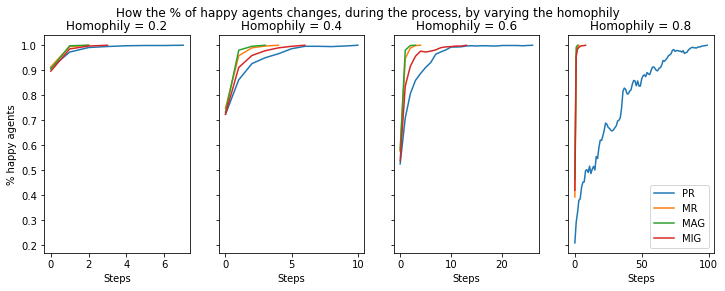

In [43]:
f, ax = plt.subplots(1,4, figsize=(12, 4), sharey = True)

p1 = df1[(df1["homophily"]==homophily_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[0].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[0].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[0].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[0].set_title('Homophily = 0.2')
ax[0].set_ylabel('% happy agents')
ax[0].set_xlabel('Steps')

###############################

p1 = df1[(df1["homophily"]==homophily_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[1].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[1].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[1].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[1].set_title('Homophily = 0.4')
ax[1].set_xlabel('Steps')
###############################

p1 = df1[(df1["homophily"]==homophily_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[2].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[2].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[2].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[2].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[2].set_title('Homophily = 0.6')
ax[2].set_xlabel('Steps')
###############################

p1 = df1[(df1["homophily"]==homophily_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[3].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[3].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[3].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[3].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[3].set_title('Homophily = 0.8')
ax[3].set_xlabel('Steps')
###############################


f.suptitle('How the % of happy agents changes, during the process, by varying the homophily')
plt.legend()
plt.show()



With different homophily values, the final percentage of happy agents is the same, what changes is the number of steps required to converge. An higher homophily is correleted with an higher number of steps needed to converge. This because an higher homophily implies more constraints to be satisfied, specifically means that each agent needs more agents like him around him, so on average, if all agents start in random positions, this require more steps. 

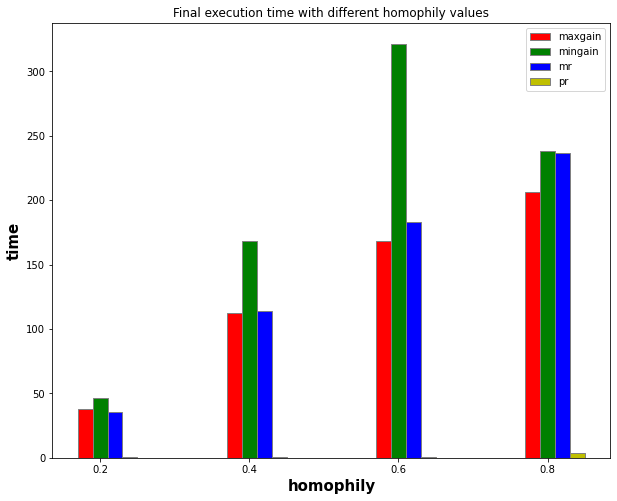

In [29]:
import numpy as np
import matplotlib.pyplot as plt

r = df1.groupby(["homophily","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for hom in homophily_set:
    max_gain.append(r.loc[hom].loc["max_gain"].values[0])
    min_gain.append(r.loc[hom].loc["min_gain"].values[0])
    mR.append(r.loc[hom].loc["mild_random"].values[0])
    pr.append(r.loc[hom].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(homophily_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		homophily_set)

plt.title("Final execution time with different homophily values")
plt.legend()
plt.show()


**FIXED NEIGHBORHOOD_TYPE-DENSITY-HOMOPHILY-MINORITY, VARY SIDE**

In [108]:
parameters = {"side": [20,40,60], "neighborhood_type":["rel"], "density": [0.6], "homophily": [0.4], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_ndhm_s = pd.DataFrame(results)
df_ndhm_s.to_csv('df_ndhm_s_2', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [12:38<00:00, 63.24s/it]


In [16]:
df2 = pd.read_csv('df_ndhm_s_2.csv')  
df2 = df2.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df2

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,20,rel,0.6,0.4,0.4,pure_random,0.673387,0.518404,0.013046,0.000000,NaN,NaN
1,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,0.0,1.000000
2,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,1.0,0.000000
3,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,2.0,0.750000
4,1,20,rel,0.6,0.4,0.4,pure_random,0.866935,0.644014,0.000000,0.000000,3.0,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87035,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2174.0,0.666667
87036,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2175.0,0.600000
87037,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2176.0,1.000000
87038,7,60,rel,0.6,0.4,0.4,min_gain,1.000000,0.772164,0.036781,748.042645,2177.0,1.000000


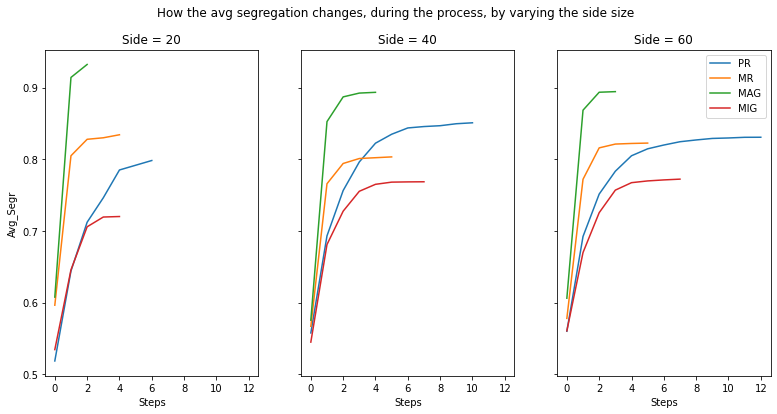

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(13, 6), sharey = True, sharex = True)

p1 = df2[(df2["side"]==side_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax1.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax1.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax1.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax1.set_title('Side = 20')
ax1.set_ylabel('Avg_Segr')
ax1.set_xlabel('Steps')
###################################################

p1 = df2[(df2["side"]==side_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax2.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax2.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax2.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax2.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax2.set_title('Side = 40')
ax2.set_xlabel('Steps')
####################################################

p1 = df2[(df2["side"]==side_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax3.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax3.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax3.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax3.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax3.set_title('Side = 60')
ax3.set_xlabel('Steps')


f.suptitle('How the avg segregation changes, during the process, by varying the side size')
plt.legend()

The plot above shows that, if we leave all the other parameters unchanged, the number of steps required to converge is independent with respect to the size of the grid  

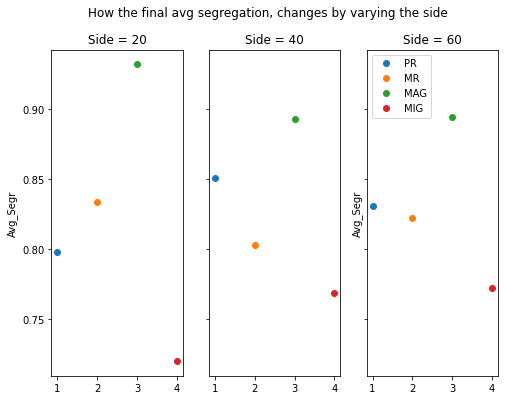

In [19]:
f, ax = plt.subplots(1,3, figsize=(8, 6), sharey = True)

p1 = df2[(df2["side"]==side_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[0].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[0].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[0].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[0].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[0].set_title('Side = 20')
ax[0].set_ylabel('Avg_Segr')

###############################


p1 = df2[(df2["side"]==side_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[1].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[1].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[1].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[1].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[1].set_title('Side = 40')

######################################################

p1 = df2[(df2["side"]==side_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
PR = PR.sort_values(by="Step")
PR.reset_index(drop=True, inplace=True)

MR = p1[p1["relocation_policy"]=="mild_random"]
MR = MR.sort_values(by="Step")
MR.reset_index(drop=True, inplace=True)

MAG = p1[p1["relocation_policy"]=="max_gain"]
MAG = MAG.sort_values(by="Step")
MAG.reset_index(drop=True, inplace=True)

MIG = p1[p1["relocation_policy"]=="min_gain"]
MIG = MIG.sort_values(by="Step")
MIG.reset_index(drop=True, inplace=True)

ax[2].plot(1,PR['tot_seg'].max(),'o',  label='PR')
ax[2].plot(2, MR['tot_seg'].max(), 'o', label='MR')
ax[2].plot(3,MAG['tot_seg'].max(), 'o', label='MAG')
ax[2].plot(4, MIG['tot_seg'].max(), 'o', label='MIG')

ax[2].set_title('Side = 60')
ax[2].set_ylabel('Avg_Segr')
########################################################


f.suptitle('How the final avg segregation, changes by varying the side')
plt.legend()
plt.show()


The graph above shows a veiled trend that the avg final segregation tend to decrease by increasing the side size, so their values are inversely proportional.
This could be explained considering the fact that by increasing the size of the grid, instead of having few huge cluster, we can get many smaller clusters, so having an avg segregation that is smaller.

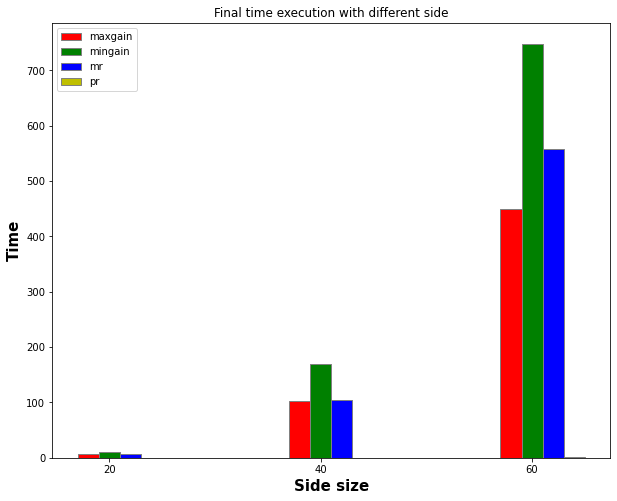

In [20]:
import numpy as np
import matplotlib.pyplot as plt

r = df2.groupby(["side","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for side in side_set:
    max_gain.append(r.loc[side].loc["max_gain"].values[0])
    min_gain.append(r.loc[side].loc["min_gain"].values[0])
    mR.append(r.loc[side].loc["mild_random"].values[0])
    pr.append(r.loc[side].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(side_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('Side size', fontweight ='bold', fontsize = 15)
plt.ylabel('Time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		side_set)

plt.title("Final time execution with different side")
plt.legend()
plt.show()


Even if the number of steps needed to converge remains unchanged when we vary the side size, the total execution time increase since a greater gird size implies a greater number of agents, so the total time is bigger.

**FIXED SIDE-DENSITY-HOMOPHILY-MINORITY, VARY NEIGHBORHOOD_TYPE**

In [109]:
parameters = {"side": [40], "neighborhood_type":["abs","rel"], "density": [0.6], "homophily": [0.4], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sdhm_n = pd.DataFrame(results)
df_sdhm_n.to_csv('df_sdhm_n_2', index=False)

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [28:58<00:00, 217.31s/it]


In [21]:
df3 = pd.read_csv('df_sdhm_n_2.csv')  
df3 = df3.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df3

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.6,0.4,0.4,pure_random,0.749480,0.564677,0.078534,0.000000,NaN,NaN
1,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,0.0,0.000
2,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,1.0,0.500
3,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,2.0,0.400
4,1,40,rel,0.6,0.4,0.4,pure_random,0.879418,0.697494,0.028196,0.000000,3.0,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
599980,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,954.0,1.000
599981,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,955.0,0.875
599982,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,956.0,0.500
599983,200,40,abs,0.6,0.4,0.4,mild_random,0.976017,0.817518,7.808764,1718.456315,957.0,0.625


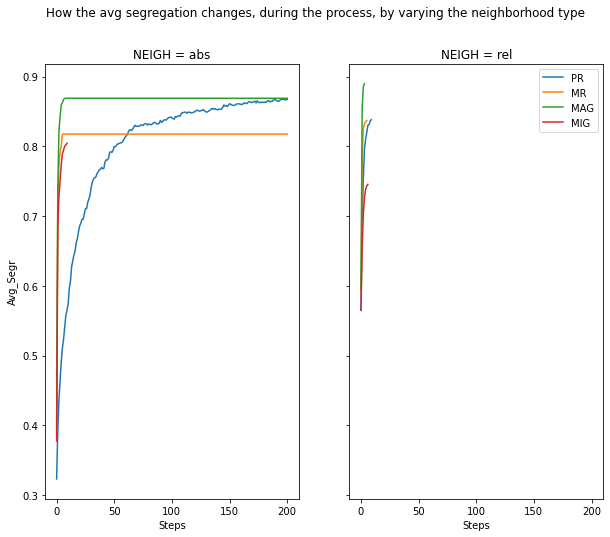

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 8), sharey = True, sharex = True)

p1 = df3[(df3["neighborhood_type"]==neighborhood_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax1.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax1.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax1.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax1.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax1.set_title('NEIGH = abs')
ax1.set_ylabel('Avg_Segr')
ax1.set_xlabel('Steps')

###################################################

p1 = df3[(df3["neighborhood_type"]==neighborhood_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax2.plot(PR["Step"],PR["tot_seg"],  label='PR')
ax2.plot(MR["Step"], MR["tot_seg"],  label='MR')
ax2.plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax2.plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax2.set_title('NEIGH = rel')
ax2.set_xlabel('Steps')


f.suptitle('How the avg segregation changes, during the process, by varying the neighborhood type')
plt.legend()

This plot shows how the number of steps required to converge change when we move from an absolute neighborhood to a relative one. This happens because:
* if we have an absolute type, the segregation formula has a fixed value (8, due to the moore neighborhood) at the denominator, so the num of similar agents around him must be high
* if we have a relative type, the segregation formula has a variable value (num of agents in the moore neighborhood) at the denominator, so the num of similar agents can be smaller.

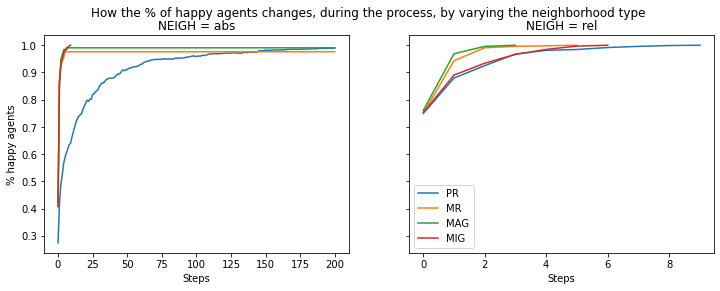

In [23]:
f, ax = plt.subplots(1,2, figsize=(12, 4), sharey = True)

p1 = df3[(df3["neighborhood_type"]=="abs")]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[0].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[0].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[0].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[0].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[0].set_title('NEIGH = abs')
ax[0].set_ylabel('% happy agents')
ax[0].set_xlabel('Steps')

###############################

p1 = df3[(df3["neighborhood_type"]=="rel")]

PR = p1[p1["relocation_policy"]=="pure_random"]

MR = p1[p1["relocation_policy"]=="mild_random"]

MAG = p1[p1["relocation_policy"]=="max_gain"]

MIG = p1[p1["relocation_policy"]=="min_gain"]

ax[1].plot(PR.groupby("Step")["perc_happy"].max(),  label='PR')
ax[1].plot(MR.groupby("Step")["perc_happy"].max(), label='MR')
ax[1].plot(MAG.groupby("Step")["perc_happy"].max(), label='MAG')
ax[1].plot(MIG.groupby("Step")["perc_happy"].max(), label='MIG')

ax[1].set_title('NEIGH = rel')
ax[1].set_xlabel('Steps')

f.suptitle('How the % of happy agents changes, during the process, by varying the neighborhood type')
plt.legend()
plt.show()



Here is showed that with the absoulte neighborhood type, we reach faster an happiness percentage close to 1, but it remains unchanged over time, since can't completely converge.
Instead using a relative neighborhood the algorithm completely converges.

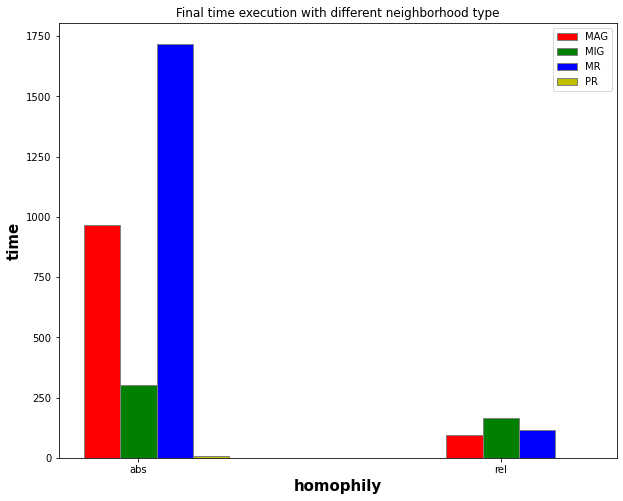

In [29]:
import numpy as np
import matplotlib.pyplot as plt

r = df3.groupby(["neighborhood_type","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for neighborhood in neighborhood_set:
    max_gain.append(r.loc[neighborhood].loc["max_gain"].values[0])
    min_gain.append(r.loc[neighborhood].loc["min_gain"].values[0])
    mR.append(r.loc[neighborhood].loc["mild_random"].values[0])
    pr.append(r.loc[neighborhood].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(neighborhood_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='MAG')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='MIG')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='MR')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='PR')


# Adding Xticks
plt.xlabel('homophily', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		neighborhood_set)

plt.title("Final time execution with different neighborhood type")
plt.legend()
plt.show()


**FIXED SIDE-NEIGHBORHOOD-HOMOPHILY-MINORITY, VARY DENSITY**

In [110]:
parameters = {"side": [40], "neighborhood_type":["rel"], "density": [0.2, 0.4,0.6,0.8], "homophily": [0.4], 
              "minority_pc":[0.4],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_snhm_d = pd.DataFrame(results)
df_snhm_d.to_csv('df_snhm_d_2', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [05:02<00:00, 18.88s/it]


In [25]:
df4 = pd.read_csv('df_snhm_d_2.csv')  
df4 = df4.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df4

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.2,0.4,0.4,pure_random,0.540625,0.474844,0.031848,0.000000,NaN,NaN
1,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,0.0,0.000000
2,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,1.0,0.666667
3,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,2.0,0.000000
4,1,40,rel,0.2,0.4,0.4,pure_random,0.765625,0.682240,0.010708,0.000000,3.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85920,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,946.0,0.666667
85921,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,947.0,0.500000
85922,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,948.0,1.000000
85923,10,40,rel,0.6,0.4,0.4,min_gain,1.000000,0.776918,0.019505,197.531538,949.0,1.000000


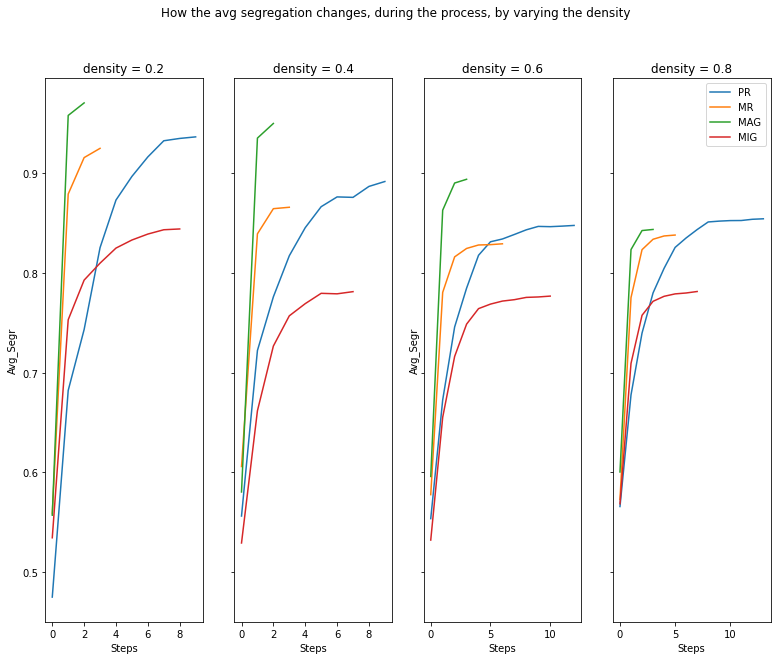

In [26]:
f, ax = plt.subplots(1,4, figsize=(13, 10), sharey = True)

p1 = df4[(df4["density"]==density_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[0].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[0].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[0].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[0].set_title('density = 0.2')
ax[0].set_ylabel('Avg_Segr')
ax[0].set_xlabel('Steps')
###################################################

p1 = df4[(df4["density"]==density_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[1].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[1].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[1].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[1].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[1].set_title('density = 0.4')
ax[1].set_xlabel('Steps')
####################################################

p1 = df4[(df4["density"]==density_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[2].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[2].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[2].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[2].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[2].set_title('density = 0.6')
ax[2].set_xlabel('Steps')
ax[2].set_ylabel('Avg_Segr')
#################################################

p1 = df4[(df4["density"]==density_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[3].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[3].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[3].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[3].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[3].set_title('density = 0.8')
ax[3].set_xlabel('Steps')

f.suptitle('How the avg segregation changes, during the process, by varying the density')
plt.legend()

This happens because, fixing the neighborhood type to relative, implies that in order to be happy, each agent need less agents of the same type around him than the neighborhood type set as absolute would require.

So if we fix the grid size and the homophily and we let grow the density, we get that:
* if the density is low, we end up having many small isolated clusters, each composed of few agents of the same type, so with a large avg sergregation
* if the density is high, we end up having few large clusters, close to each other, leading to a smaller avg segregation


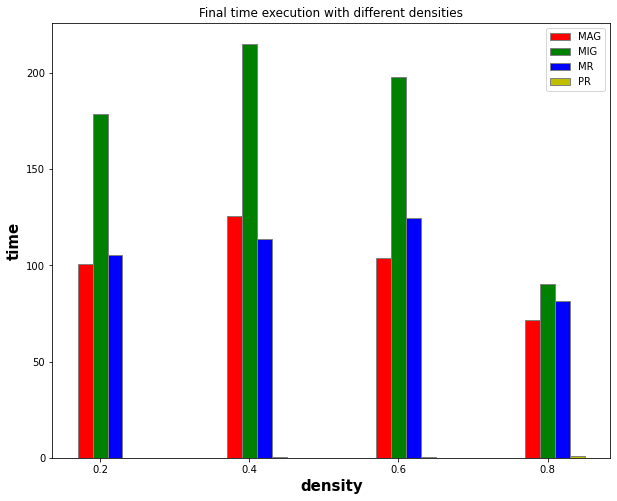

In [30]:
import numpy as np
import matplotlib.pyplot as plt

r = df4.groupby(["density","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for density in density_set:
    max_gain.append(r.loc[density].loc["max_gain"].values[0])
    min_gain.append(r.loc[density].loc["min_gain"].values[0])
    mR.append(r.loc[density].loc["mild_random"].values[0])
    pr.append(r.loc[density].loc["pure_random"].values[0])    


# Set position of bar on X axis
br1 = np.arange(len(density_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='MAG')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='MIG')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='MR')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='PR')


# Adding Xticks
plt.xlabel('density', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		density_set)


plt.title("Final time execution with different densities")
plt.legend()
plt.show()


The plot above, could be explained by considering firstly that the agent are placed initially at random, then that having fixed the homophily if we increase the density we get more agents close to each other. 

We could expect that, increasing the density, the number of agents moved in each step is overall smaller


**FIXED SIDE-NEIGHBORHOOD_TYPE-DENSITY-HOMOPHILY, VARY MINORITY**

In [111]:
parameters = {"side": [40], "neighborhood_type":["rel"], "density": [0.6], "homophily": [0.4], 
              "minority_pc":[0.2,0.4,0.6,0.8],"relocation_policy":["pure_random","mild_random","max_gain","min_gain"],
              "skip_if_not_happy":True}


#Run a batch of 10 iterations for each of 8 configuration
results = batch_run(
    SchellingModel,
    parameters=parameters,
    iterations= 1,
    max_steps=200,
    number_processes=8,
    data_collection_period=1,
    display_progress=True,
)
df_sndh_m = pd.DataFrame(results)
df_sndh_m.to_csv('df_sndh_m_2', index=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [03:46<00:00, 14.13s/it]


In [31]:
df5 = pd.read_csv('df_sndh_m_2.csv')  
df5 = df5.drop(['skip_if_not_happy', 'x','y','iteration', "RunId"], axis=1)
df5

,Step,side,neighborhood_type,density,homophily,minority_pc,relocation_policy,perc_happy,tot_seg,elapsed_step_time,elapsed_total_time,AgentID,segregation
0,0,40,rel,0.6,0.4,0.4,pure_random,0.755946,0.571778,0.067538,0.000000,NaN,NaN
1,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,0.0,1.000000
2,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,1.0,0.500000
3,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,2.0,0.400000
4,1,40,rel,0.6,0.4,0.4,pure_random,0.879007,0.681998,0.039972,0.000000,3.0,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124600,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,966.0,0.666667
124601,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,967.0,0.750000
124602,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,968.0,0.600000
124603,6,40,rel,0.6,0.4,0.6,min_gain,1.000000,0.773693,0.020327,160.515609,969.0,0.500000


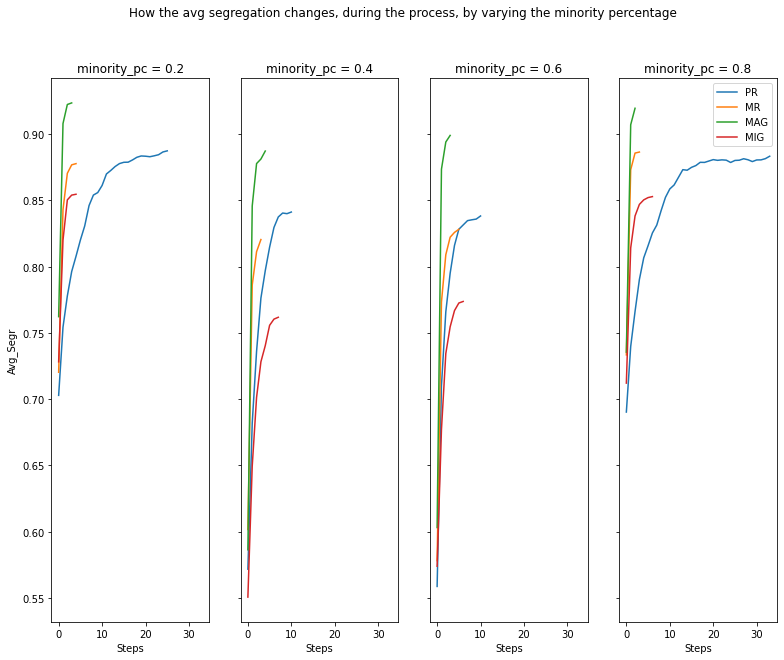

In [32]:
f, ax = plt.subplots(1,4, figsize=(13, 10), sharey = True, sharex = True)

p1 = df5[(df5["minority_pc"]==minority_set[0])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[0].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[0].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[0].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[0].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[0].set_title('minority_pc = 0.2')
ax[0].set_xlabel('Steps')
ax[0].set_ylabel('Avg_Segr')
###################################################

p1 = df5[(df5["minority_pc"]==minority_set[1])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[1].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[1].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[1].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[1].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[1].set_title('minority_pc = 0.4')
ax[1].set_xlabel('Steps')
####################################################

p1 = df5[(df5["minority_pc"]==minority_set[2])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[2].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[2].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[2].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[2].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[2].set_title('minority_pc = 0.6')
ax[2].set_xlabel('Steps')
#################################################

p1 = df5[(df5["minority_pc"]==minority_set[3])]

PR = p1[p1["relocation_policy"]=="pure_random"]
MR = p1[p1["relocation_policy"]=="mild_random"]
MAG = p1[p1["relocation_policy"]=="max_gain"]
MIG = p1[p1["relocation_policy"]=="min_gain"]


ax[3].plot(PR["Step"],PR["tot_seg"],  label='PR')
ax[3].plot(MR["Step"], MR["tot_seg"],  label='MR')
ax[3].plot(MAG["Step"], MAG["tot_seg"],  label='MAG')
ax[3].plot(MIG["Step"], MIG["tot_seg"],  label='MIG')

ax[3].set_title('minority_pc = 0.8')
ax[3].set_xlabel('Steps')


f.suptitle('How the avg segregation changes, during the process, by varying the minority percentage')
plt.legend()

The plot above shows that the more proportionate are the two types of agents, the less they become segregated. 

In fact if a given agent type is in a minority, the only way to be happy (so to become a relative majority), is to join others agents of the same type, but since they're rare, they need to segregate (self-segregation of a minority). This implies that also the majority type agents become segregated, since the agents in the minority move out from their clusters.    

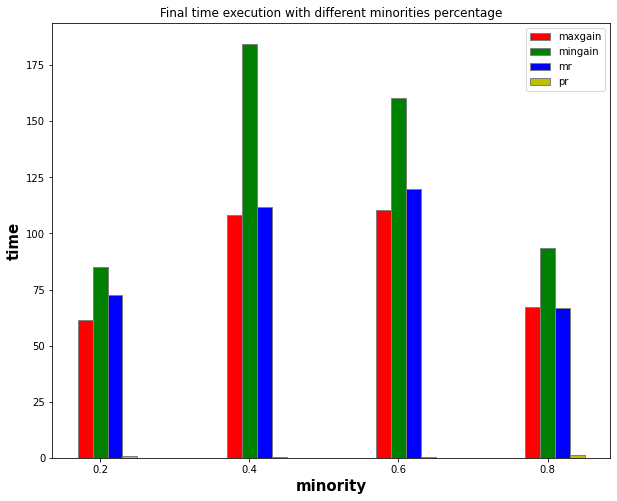

In [34]:
import numpy as np
import matplotlib.pyplot as plt

r = df5.groupby(["minority_pc","relocation_policy"]).max()[["elapsed_total_time"]]
r


# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))

# set height of bar
max_gain = []
mR = []
min_gain = []
pr = []

for minority_pc in minority_set:
    max_gain.append(r.loc[minority_pc].loc["max_gain"].values[0])
    min_gain.append(r.loc[minority_pc].loc["min_gain"].values[0])
    mR.append(r.loc[minority_pc].loc["mild_random"].values[0])
    pr.append(r.loc[minority_pc].loc["pure_random"].values[0])    

# Set position of bar on X axis
br1 = np.arange(len(minority_set))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, max_gain, color ='r', width = barWidth,
		edgecolor ='grey', label ='maxgain')
plt.bar(br2, min_gain, color ='g', width = barWidth,
		edgecolor ='grey', label ='mingain')
plt.bar(br3, mR, color ='b', width = barWidth,
		edgecolor ='grey', label ='mr')
plt.bar(br4, pr, color ='y', width = barWidth,
		edgecolor ='grey', label ='pr')


# Adding Xticks
plt.xlabel('minority', fontweight ='bold', fontsize = 15)
plt.ylabel('time', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(br1))],
		minority_set)


plt.title("Final time execution with different minorities percentage")
plt.legend()
plt.show()


The graph above can be explained by continuing the argument started in the graph showed before. 
Since when we have a minority, they need to move more than the agents in a majority, since they're less in number, overall we'll get fewer agents moving in each iteration.   